In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
heart_df = pd.read_csv("heart.csv")

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.shape

(303, 14)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# capture the target column ("default") into separate vectors for training set and test set

X = heart_df.drop("target" , axis=1)

y = heart_df.pop("target")

In [7]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [8]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [9]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [10]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Heart_Tree_File = open('d:\heart_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Heart_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Heart_Tree_File.close()

In [11]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

               Imp
age       0.093349
sex       0.069684
cp        0.258870
trestbps  0.027304
chol      0.052181
fbs       0.028669
restecg   0.013032
thalach   0.056953
exang     0.020774
oldpeak   0.131152
slope     0.048749
ca        0.124819
thal      0.074463


In [12]:
y_predict = dt_model.predict(X_test)

In [13]:
# Regularising the Decision Tree

In [14]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [15]:
heart_tree_regularized = open('d:\heart_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= heart_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

heart_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

               Imp
age       0.093349
sex       0.069684
cp        0.258870
trestbps  0.027304
chol      0.052181
fbs       0.028669
restecg   0.013032
thalach   0.056953
exang     0.020774
oldpeak   0.131152
slope     0.048749
ca        0.124819
thal      0.074463


In [16]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [17]:
ytrain_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [18]:
ytrain_predict1 = reg_dt_model.predict_proba(X_train)
ytest_predict1 = reg_dt_model.predict_proba(X_test)

In [19]:
ytrain_predict1

array([[0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.72727273, 0.27272727],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.72727273, 0.27272727],
       [0.20689655, 0.79310345],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.20689655, 0.79310345],
       [0.20689655, 0.79310345],
       [0.1       , 0.9       ],
       [0.07142857, 0.92857143],
       [0.7       , 0.3       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.07142857, 0.92857143],
       [0.5       , 0.5       ],
       [0.1       , 0.9       ],
       [0.

In [20]:
import matplotlib.pyplot as plt

AUC: 0.932


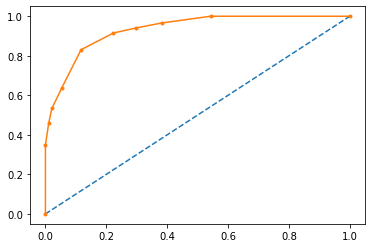

In [21]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.834


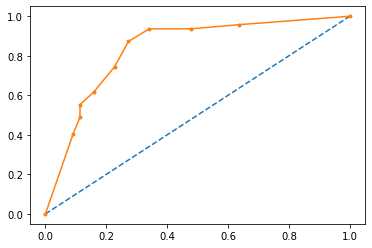

In [22]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        94
           1       0.90      0.83      0.86       118

    accuracy                           0.85       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.86      0.85      0.85       212



In [25]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        44
           1       0.78      0.74      0.76        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [27]:
confusion_matrix(train_labels, ytrain_predict)

array([[83, 11],
       [20, 98]], dtype=int64)

In [28]:
confusion_matrix(test_labels, ytest_predict)

array([[34, 10],
       [12, 35]], dtype=int64)

In [29]:
reg_dt_model.score(X_train,train_labels)

0.8537735849056604

In [30]:
reg_dt_model.score(X_test,test_labels)

0.7582417582417582